# Aim

Make the vibration peak ID functions better, using the Welch periodogram.

In [138]:
using DSP, NPZ, Plots, PyCall, LsqFit

┌ Info: Precompiling LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1317


In [4]:
ol = npzread("../data/sims/ol_atm_1_vib_3.npy")[:,1];

In [205]:
s = ol[1:10000]
pgram = welch_pgram(s, nfft=max(1000, length(s)÷2), fs=1000);
npzwrite("../data/sims/pgram_atm_1_vib_3.npy", power(pgram))

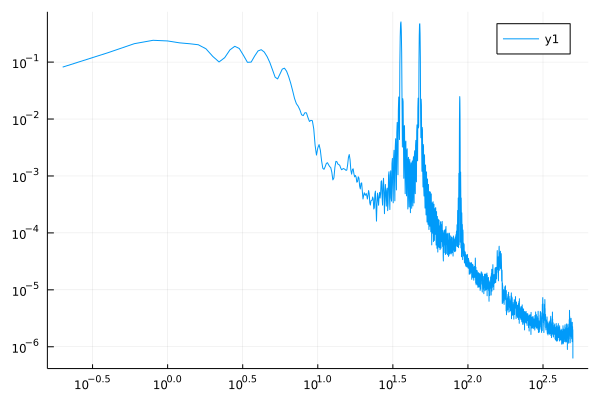

In [169]:
plot(freq(pgram)[2:end], power(pgram)[2:end], xaxis=:log10, yaxis=:log10)

In [191]:
locs, peaks = signal.find_peaks(power(pgram), height=1e-4)
peaks = peaks["peak_heights"];

In [192]:
freq(pgram)[locs[sortperm(peaks)]]

87-element Vector{Float64}:
 83.80000000000001
 69.60000000000001
 67.8
 92.4
 70.2
 71.2
 64.8
 84.4
 66.4
 91.60000000000001
 65.60000000000001
 67.2
 64.0
  ⋮
  8.0
 48.6
 36.6
 46.400000000000006
 34.4
 88.0
  5.800000000000001
  4.0
  2.6
  0.6000000000000001
 47.6
 35.6

In [ ]:
function clip(pgram::DSP.Periodogram)
    
end

In [170]:
signal = pyimport("scipy.signal")

PyObject <module 'scipy.signal' from '/Users/adityasengupta/opt/anaconda3/lib/python3.8/site-packages/scipy/signal/__init__.py'>

In [199]:
fmask = 1000/60 .< freq(pgram) .< 1000/3;

In [200]:
@. model(f, params) = exp(params[1] + log(f) * params[2]);
fit = curve_fit(model, freq(pgram)[fmask], power(pgram)[fmask], [1, -5/3]);

In [203]:
coef(fit)

2-element Vector{Float64}:
 -1.1654166429071326
 -0.9617755898321316

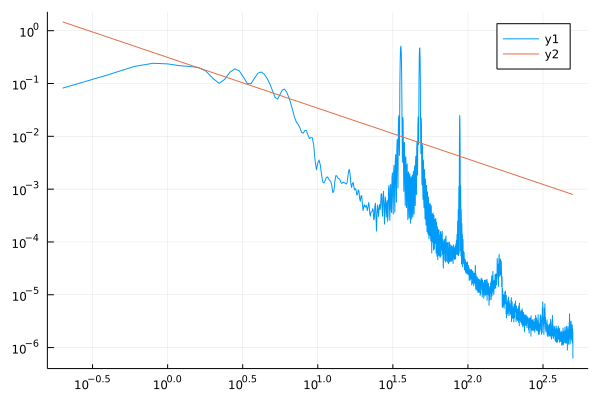

In [202]:
p = plot()
plot!(freq(pgram)[2:end], power(pgram)[2:end], xaxis=:log10, yaxis=:log10)
plot!(freq(pgram)[2:end], model(freq(pgram)[2:end], coef(fit)), xaxis=:log10, yaxis=:log10)
#plot!(freq(pgram)[2:end], max.(1e-8, -fit.resid), xaxis=:log10, yaxis=:log10)

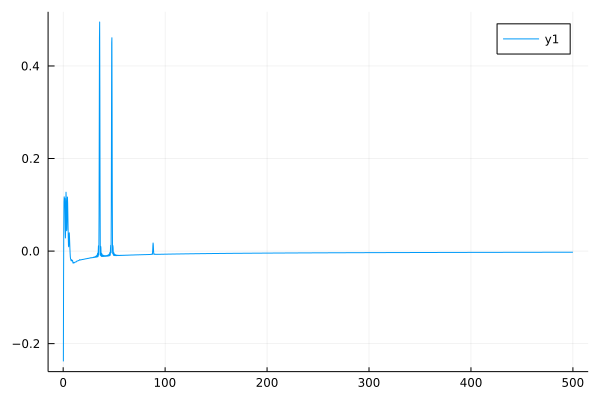

In [172]:
plot(freq(pgram)[2:end], -fit.resid)

In [173]:
locs, peaks = signal.find_peaks(-fit.resid, height=1e-4)
peaks = peaks["peak_heights"]

12-element Vector{Float64}:
 0.11729543610249937
 0.11444552139086152
 0.12726265377384297
 0.11680013844645629
 0.039460511178940214
 0.011327149683884402
 0.49506080057588076
 0.010222980331817027
 0.012412837064339275
 0.4609914999020032
 0.011754504327153309
 0.017477256243752126

In [174]:
locs

12-element Vector{Int64}:
   4
   6
  13
  20
  29
 172
 178
 183
 232
 238
 243
 440

In [133]:
# npzwrite("../data/sims/pgram_atm_1_vib_3.npy", power(pgram))